<a href="https://colab.research.google.com/github/SaydobidXusanov/Multimedia-Computing/blob/main/MC_Image_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intensity Transformations (MC)
## Gamma Correction

In [18]:
# Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import re

In [3]:
# Open the image
img = cv2.imread("landscape.jpg")

In [4]:
img

array([[[ 18,  25,  22],
        [ 18,  25,  22],
        [ 18,  25,  22],
        ...,
        [ 70,  86, 103],
        [ 69,  85, 102],
        [ 69,  85, 102]],

       [[ 19,  26,  23],
        [ 19,  26,  23],
        [ 19,  26,  23],
        ...,
        [ 70,  86, 103],
        [ 70,  86, 103],
        [ 70,  86, 103]],

       [[ 19,  26,  23],
        [ 19,  26,  23],
        [ 19,  26,  23],
        ...,
        [ 71,  87, 104],
        [ 71,  87, 104],
        [ 71,  87, 104]],

       ...,

       [[ 24,  40,  46],
        [ 23,  39,  45],
        [ 21,  40,  45],
        ...,
        [ 12,  43,  36],
        [ 11,  42,  35],
        [ 12,  43,  36]],

       [[ 24,  38,  44],
        [ 23,  39,  45],
        [ 23,  42,  47],
        ...,
        [ 16,  47,  40],
        [ 14,  47,  40],
        [ 15,  48,  41]],

       [[ 22,  36,  42],
        [ 22,  38,  44],
        [ 24,  40,  46],
        ...,
        [ 20,  51,  44],
        [ 19,  52,  45],
        [ 21,  54,  47]]

In [5]:
# For a list of gamma values
for gamma in [0.1, 0.5, 1.2, 2.2]:

  # Apply gamma correction
  gamma_corrected = np.array(255 * (img / 255) ** gamma,
                             dtype="uint8")

  # Save the edited images
  cv2.imwrite("gamma_transformed" + str(gamma) + ".jpg", gamma_corrected)

In [19]:
# Open an empty list for images
gamma_imgs = []

# Loop through the files in the current directory
for dir in os.listdir('.'):

  # Find the file with the correct prefix and suffix
  if 'gamma_transformed' in dir and '.jpg' in dir:
      print(dir)

      # Extract the gamma value
      gamma_value = re.search(r'gamma_transformed([0-9.]+)\.jpg', dir).group(1)

      # Generate the dictionary with necessary keys and values, then append it to the list
      gamma_imgs.append({"name": dir, "content": plt.imread(dir), "gamma_value": gamma_value})

print(len(gamma_imgs))

gamma_transformed1.2.jpg
gamma_transformed2.2.jpg
gamma_transformed0.1.jpg
gamma_transformed0.5.jpg
4


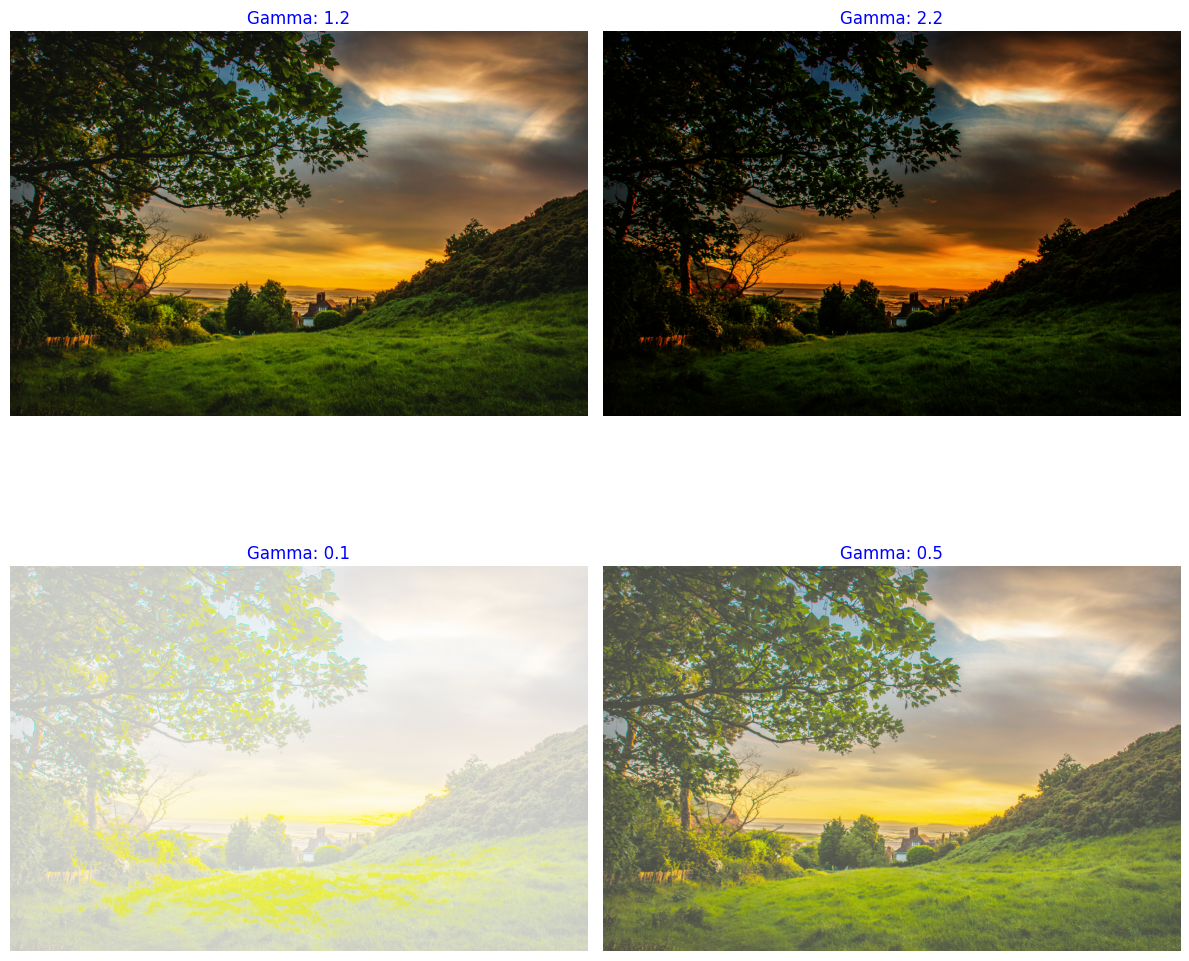

In [20]:
n_imgs = len(gamma_imgs)

# Calculate the number of rows and columns for the grid
n_cols = math.ceil(math.sqrt(n_imgs))
n_rows = math.ceil(n_imgs / n_cols)

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))

# Flatten axes in case the grid is not a perfect square
axes = axes.flatten()

# Loop through images and display them with gamma value as title
for i, img_data in enumerate(gamma_imgs):
    axes[i].imshow(img_data['content'])
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"Gamma: {img_data['gamma_value']}", fontsize=12, color='blue')

# Hide any remaining empty subplots
for i in range(n_imgs, len(axes)):
    axes[i].axis('off')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()